In [2]:
%matplotlib widget

from DatasetTester import *
import matplotlib.pyplot as plt
import numpy as np

from GetLandmarks import GetLandmarks 
from landmark_utils import *

from LandmarkTester import LandmarkTester 

import pandas as pd
from sklearn.metrics import mean_squared_error

from ProcessResults import *
from scipy.stats import percentileofscore, gaussian_kde

import seaborn as sns

from vis_utils import *

In [3]:
test = DatasetIntegrator("./NeuroFace_Open_Access_Data/")

Patient A002 loading...
Patient A006 loading...
Patient A008 loading...
Patient A009 loading...
Patient A010 loading...
Patient A011 loading...
Patient A012 loading...
Patient A014 loading...
Patient A015 loading...
Patient A016 loading...


[ WARN:0@25.323] global /home/conda/feedstock_root/build_artifacts/libopencv_1647792290612/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('NeuroFace_Open_Access_Data/ALS/Frames/A016_02_NSM_BIGSMILE_color.avi_160.jpg'): can't open/read file: check file path/integrity


Patient A017 loading...
Patient OP01 loading...
Patient OP02 loading...
Patient OP03 loading...
Patient S001 loading...
Patient S002 loading...
Patient S003 loading...
Patient S005 loading...
Patient S006 loading...
Patient S007 loading...
Patient S008 loading...
Patient S009 loading...
Patient S011 loading...
Patient S012 loading...
Patient S013 loading...
Patient N001 loading...
Patient N002 loading...
Patient N003 loading...
Patient N004 loading...
Patient N007 loading...
Patient N008 loading...
Patient N010 loading...
Patient N011 loading...
Patient N012 loading...
Patient N017 loading...
Patient N019 loading...
DatasetIntegrator initialized.
ALS: 11
Stroke: 14
Control: 11


In [4]:
#('BBP_NORMAL', 'DDK_PATAKA', 'DDK_PA', 'NSM_BLOW', 'NSM_KISS', 'NSM_OPEN', 'NSM_SPREAD', 'NSM_BIGSMILE', 'NSM_BROW')
generator = test.patients_generator(disease_type="control", tasks=('NSM_BLOW'))
all_controls = np.array(list(generator))

In [5]:
features_list = []

for this_dict in all_controls:
    pat_dict = this_dict[0]
    for t in pat_dict.keys():
        task_dict = pat_dict[t]
        for f in task_dict.keys():
            lms_gt = task_dict[f]['landmarks_gt']
            bbox = task_dict[f]['bbox']
            pr = ProcessResults(lms_gt, 'lms_only')
            #pr.scale_by_bbox(bbox)
            features_list.append(pr._features)
            

In [6]:
mydf = pd.DataFrame(features_list) 
fixed_df = mydf[np.isfinite(mydf).all(1)] 

In [7]:
dataset = DatasetTester("./NeuroFace_Open_Access_Data/ALS/")
patient_id = "A009"
task = "NSM_OPEN"
model_to_use = "MEE"

Patient A002 loading...
Patient A006 loading...
Patient A008 loading...
Patient A009 loading...
Patient A010 loading...
Patient A011 loading...
Patient A012 loading...
Patient A014 loading...
Patient A015 loading...
Patient A016 loading...


[ WARN:0@43.902] global /home/conda/feedstock_root/build_artifacts/libopencv_1647792290612/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('NeuroFace_Open_Access_Data/ALS/Frames/A016_02_NSM_BIGSMILE_color.avi_160.jpg'): can't open/read file: check file path/integrity


Patient A017 loading...


In [8]:
frame = np.random.choice(list(dataset._patients[patient_id][task].keys()))
#frame = 803
frame

496

In [9]:
im = dataset._patients[patient_id][task][frame]['image']
lm_gt = dataset._patients[patient_id][task][frame]['landmarks_gt']
pr = ProcessResults(lm_gt, 'lms_only')
pat_fea = pr._features

In [10]:
print(pat_fea)


{'f0': 0.6873754911554694, 'f1': 0.9959450922675996, 'f2': 1.588227634850157, 'f3': 1.0000112, 'f4': 0.011997541, 'f5': 0.017384272, 'f6': 0.027726904, 'f7': 0.8783142570286289, 'f8': 1.0712247, 'f9': 1.2429383, 'f10': 1.030195, 'f11': 0.017682688119112458, 'f12': 0.0614444892319452, 'f13': 0.10361315426867618, 'f14': 2.083108032105102, 'f15': 1.0278561, 'f16': 1.5962648, 'f17': 1.3323942, 'f18': 0.18101765, 'f19': 0.3494769, 'f20': 0.3291483, 'f21': 1.4457624409881862, 'f22': 0.9331321586779202, 'f23': 0.8445384134796399, 'f24': 1.0195855, 'f25': 0.787483, 'f26': 0.7517062, 'f27': 0.33854946, 'f28': 0.1463722}


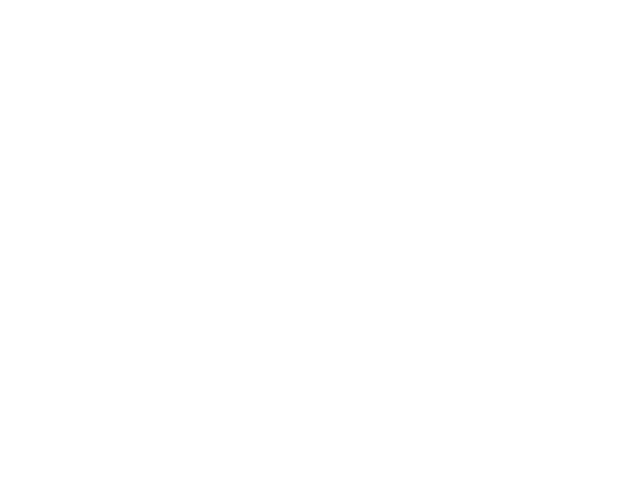

In [11]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

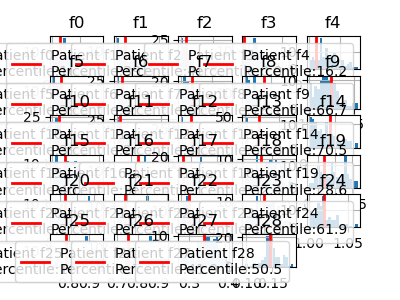

In [12]:
f, ax = plt.subplots(6,5, figsize=(4,3), sharex = False, sharey = False)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        cur_ax = ax[i][j]
        idx = i*5+j
        if idx == 29:
            cur_ax.axis('off')
            break
        fea = 'f'+str(idx)
        
        cur_ax.hist(fixed_df[fea], bins=18)       
        cur_ax.axvline(x=pat_fea[fea], color='r', linewidth=2)
        
        percentile = percentileofscore(fixed_df[fea], pat_fea[fea])
        lab = "Patient {}\nPercentile:{:.1f}".format(fea,percentile)
        cur_ax.legend(fontsize=10, loc='upper right',labels=[lab])

        #cur_ax.set_xlabel(fea)
        cur_ax.set_title(fea)
        cur_ax.grid()
        cur_ax


In [13]:
glm = to_gemma_landmarks(lm_gt)

In [14]:
rot_center = tuple(glm[48])
print(rot_center)

(245, 263)


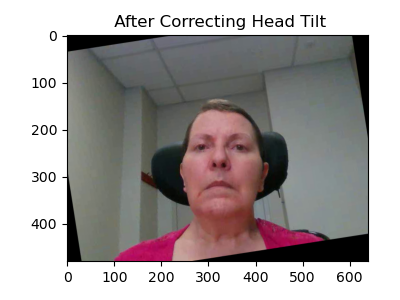

In [15]:
rot_im = rotate_image(im, (248, 262), -angle(glm, 48,49))
vis_image(np.flip(rot_im,axis=-1),  title=" After Correcting Head Tilt")

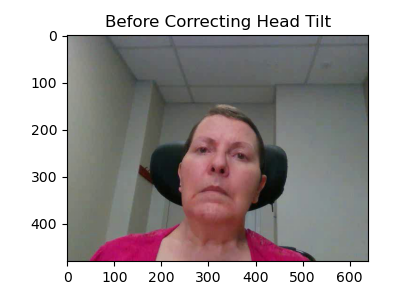

In [16]:
vis_image(np.flip(im,axis=-1), title="Before Correcting Head Tilt")

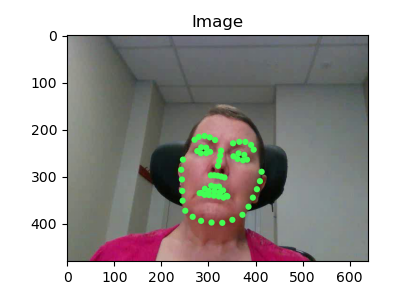

In [17]:
vis_landmarks(np.flip(im,axis=-1), lm_gt)